# Homework Assignment 3

## Question 1

### a) Examine the level of clustering in these data using Moran's statistic

In [1]:
# load in the source data
options(jupyter.plot_mimetypes = 'image/png')
set.seed(123)
source("./R-starter-code.R")


# get neigbor standardized weights 
col.W <- nb2listw(nb, style = "W", zero.policy = TRUE)
col.B <- nb2listw(nb, style = "B", zero.policy = TRUE)

Loading required package: sp
Loading required package: Matrix
Loading required package: splines


In [2]:
# get the residuals from quasi-piosson regression
lm <- glm(Observed ~ 1, offset = log(Expected), data = penn.dat, family = quasipoisson())
lm2 <- glm(Observed ~ x + y , offset = log(Expected), data = penn.dat, family = quasipoisson())

res <- residuals(lm, type = "pearson")
res2 <- residuals(lm2, type = "pearson")

In [3]:
moran.test(res, col.W)
moran.test(res, col.B)
moran.test(res2, col.W)
moran.test(res2, col.B)


	Moran I test under randomisation

data:  res  
weights: col.W  

Moran I statistic standard deviate = 3.1996, p-value = 0.0006881
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
      0.223064039      -0.015151515       0.005543012 



	Moran I test under randomisation

data:  res  
weights: col.B  

Moran I statistic standard deviate = 3.2697, p-value = 0.0005383
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
      0.218541561      -0.015151515       0.005108335 



	Moran I test under randomisation

data:  res2  
weights: col.W  

Moran I statistic standard deviate = 2.4392, p-value = 0.00736
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
      0.166950510      -0.015151515       0.005573616 



	Moran I test under randomisation

data:  res2  
weights: col.B  

Moran I statistic standard deviate = 2.3227, p-value = 0.0101
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
      0.151310186      -0.015151515       0.005136172 


### b) Examine the level of clustering in these data using Geary's statistic

In [4]:
geary.test(res, col.W)
geary.test(res, col.B)
geary.test(res2, col.W)
geary.test(res2, col.B)


	Geary C test under randomisation

data:  res 
weights: col.W 

Geary C statistic standard deviate = 2.834, p-value = 0.002298
alternative hypothesis: Expectation greater than statistic
sample estimates:
Geary C statistic       Expectation          Variance 
      0.767209265       1.000000000       0.006747194 



	Geary C test under randomisation

data:  res 
weights: col.B 

Geary C statistic standard deviate = 2.1984, p-value = 0.01396
alternative hypothesis: Expectation greater than statistic
sample estimates:
Geary C statistic       Expectation          Variance 
       0.77784441        1.00000000        0.01021162 



	Geary C test under randomisation

data:  res2 
weights: col.W 

Geary C statistic standard deviate = 2.3376, p-value = 0.009703
alternative hypothesis: Expectation greater than statistic
sample estimates:
Geary C statistic       Expectation          Variance 
      0.809401467       1.000000000       0.006647892 



	Geary C test under randomisation

data:  res2 
weights: col.B 

Geary C statistic standard deviate = 1.9552, p-value = 0.02528
alternative hypothesis: Expectation greater than statistic
sample estimates:
Geary C statistic       Expectation          Variance 
      0.807005777       1.000000000       0.009743282 


### c) Fit a Poisson lognormal-spatial smoothing model and observe clustering  
The model should fit  

$Y_i | \theta_i \sim Poisson(E_i \theta_i)$  

where  

$log(\theta_i) = \beta \times X + \epsilon_i + S_i$  

with $\epsilon_i$ and $S_i$ non-spatial and ICAR spatial random effects, using inla with the 
default prior settings. Examine the level of clustering by looking at the random effects $S_i$ and 
in particular their size in comparison with the $\epsilon_i$  

In [5]:
penn.dat$ID <- 1:nrow(penn.dat)
penn.dat$ID2 <- 1:nrow(penn.dat)
m1 <- inla(Observed ~ 1 + f(ID, model = "iid") + f(ID2, model = "besag", graph = "./penn.graph"),
           family = "poisson", E = Expected, data = penn.dat, control.predictor = list(compute = TRUE))

In [6]:
penn.dat$nonspatial_random <- exp(m1$summary.random$ID[,5])
penn.dat$spatial_random <- exp(m1$summary.random$ID2[,5])
penn2$nonspatial_random <- penn.dat$nonspatial_random
penn2$spatial_random <- penn.dat$spatial_random

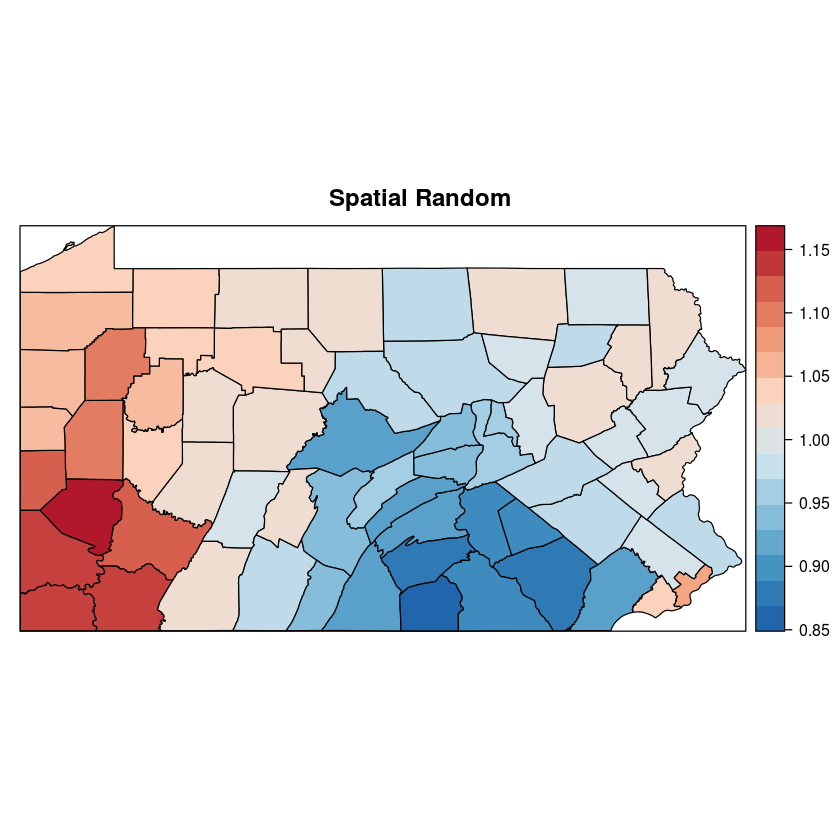

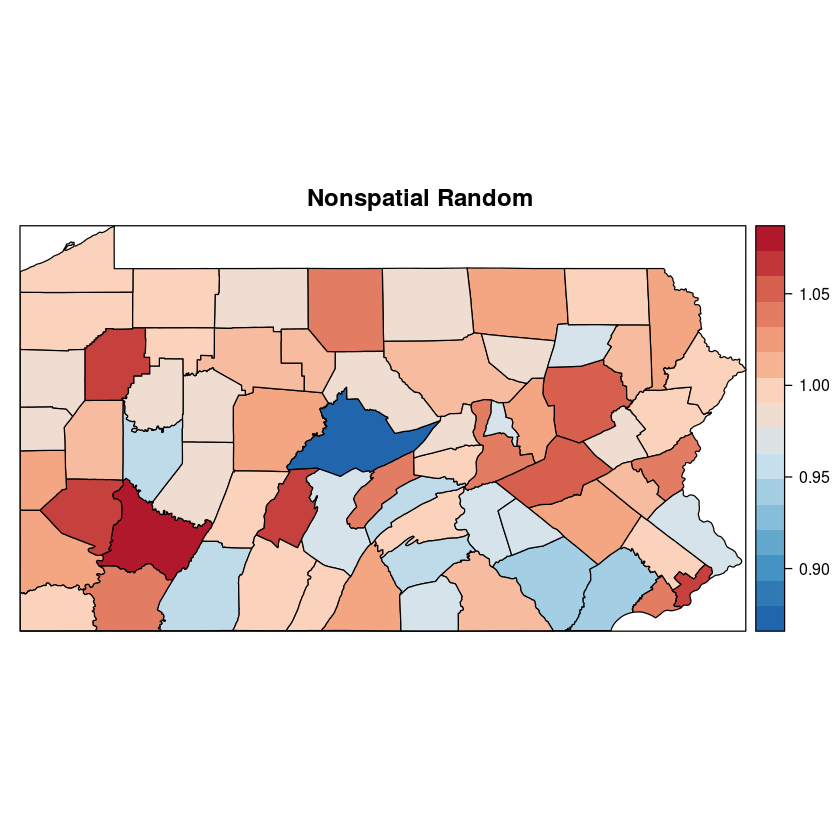

In [15]:
par(mfrow=c(2,1))
spplot(penn2, "spatial_random", main="Spatial Random",
       col.regions = colorRampPalette(rev(brewer.pal(8,"RdBu")))(50))
spplot(penn2, "nonspatial_random", main="Nonspatial Random",
       col.regions = colorRampPalette(rev(brewer.pal(8,"RdBu")))(50))

## Question 2: Cluster Detection 

### a) Examine the overdispersion from a poisson log-linear model